<a href="https://colab.research.google.com/github/bugragrms/ArrayCalculator/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [418]:
#Kütüphaneleri içe aktarma
import pandas as pd #Veri işleme
import numpy as np #Doğrusal cebir
import matplotlib.pyplot as plt #Görselleştirme
import seaborn as sns #Görselleştirme
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px #Görselleiştirme
from google.colab import files #Dosyayı yükleme
from google.colab import data_table

---

# **Dataset Hakkında**

### **Bağlam**

Veri tabanındaki verilerin toplanma amacı, tanısal ölçümlere dayalı olarak bir hastanın diyabet hastası olup olmadığını tahmin etmektir.

### **İçerik**

*   **Pregnancies:** Hamilelik Sayısı
*   **Glucose:** Oral glukoz tolerans testinde 2 saatlik plazma glukoz konsantrasyonu
*   **BloodPressure:** Diyastolik kan basıncı (mm Hg)
*   **SkinThickness:** Triceps deri kıvrım kalınlığı (mm)
*   **Insulin:** 2 saatlik serum insülini (mu U/ml)
*   **BMI:** Vücut kitle indeksi (kg cinsinden ağırlık/(m cinsinden boy)^2)
*   **DiabetesPedigreeFunction:** Diyabet soy ağacı işlevi
*   **Age:** Yaş (Yıl)
*   **Outcome:** Sınıf değişkeni (0 veya 1)

*(Outcome değeri 1 olan hastalar için diyabet testi pozitif çıkmıştır.)*


---

In [ ]:
#.csv dosyasını local'den import etme.
#uploaded = files.upload()

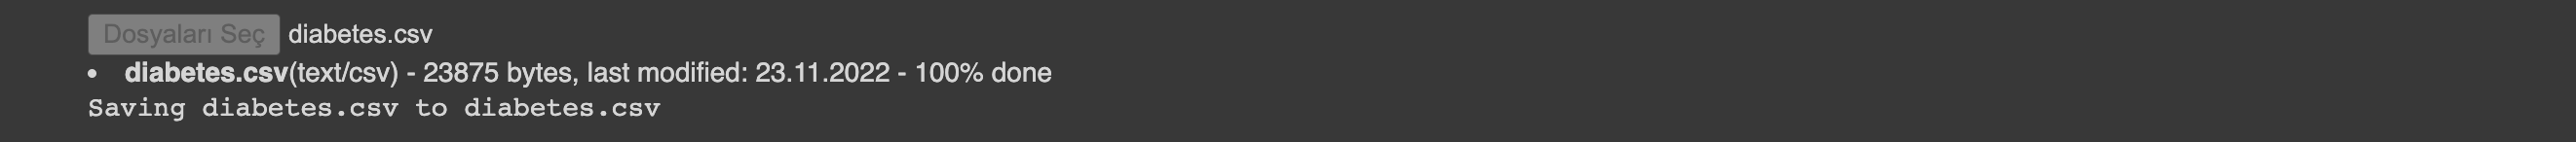

In [420]:
#import edilmiş .csv'yi okuma.
df = pd.read_csv('/content/diabetes.csv')

---

In [ ]:
#Dataset'in kaç satır ve kaç sütun olduğunu gösterme.
print("Satır Sayısı: {0}\nSütun Sayısı: {1}".format(df.shape[0],df.shape[1]))

In [ ]:
#Sütunları liste halinde yazdırma.
sutunlar = list(df.columns.values)
print(sutunlar)

In [ ]:
#Sütun sütun veri tiplerini yazdırma.
df.dtypes

In [ ]:
#Sütun sütun null değer sayısı yazdırma.
df.isnull().sum()

In [ ]:
#Sütunların istatiksel özetini yazdırma.
data_table.enable_dataframe_formatter()
df.describe(include = 'all')

In [ ]:
#Dataseti yazdırma
data_table.enable_dataframe_formatter()
df

---

In [ ]:
#İnsülin değeri 100 ve üzeri olanları BMI değerine göre büyükten küçüğe sıralama
data_table.enable_dataframe_formatter()
df.query("Insulin >= 100").sort_values(by = 'BMI', ascending = False)

In [ ]:
#Outcome değeri 1'e eşit olan satırları yazdırma
data_table.enable_dataframe_formatter()
foo = 1
df.query('Outcome == @foo')

In [ ]:
genc = df.query("Age >= 21 and Age <=40 and Outcome == 1").shape[0]
erkenOrta = df.query("Age >= 41 and Age <=60 and Outcome == 1").shape[0]
orta = df.query("Age >= 61 and Age <=80 and Outcome == 1").shape[0]
yasli = df.query("Age >= 81 and Age <=100 and Outcome == 1").shape[0]
toplamHasta = genc + erkenOrta + orta + yasli
print("21-40  Yaş Aralığında Diyabet Hastası Sayısı: ",genc)
print("41-60  Yaş Aralığında Diyabet Hastası Sayısı: ",erkenOrta)
print("61-80  Yaş Aralığında Diyabet Hastası Sayısı: ",orta)
print("81-100 Yaş Aralığında Diyabet Hastası Sayısı: ",yasli)
print("===================================================")
print("21-100 Yaş Aralığında Diyabet Hastası Sayısı: ",toplamHasta)

In [ ]:
#BMI değerine göre datasete yeni bir sütun ekleyip kilo seviyesini belirtme.
data_table.enable_dataframe_formatter()
listBMI=["Zayıf", "Normal", "Kilolu", "Obez"]
newbmi=pd.Series(listBMI)
df["NewBMI"] = newbmi
df.loc[df["BMI"] < 18.5, "NewBMI"] = newbmi[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = newbmi[1]
df.loc[(df["BMI"] >= 25) & (df["BMI"] <= 29.9), "NewBMI"] = newbmi[2]
df.loc[df["BMI"] >= 30, "NewBMI"] = newbmi[3]
df

In [ ]:
def set_insulin(df):
    if df["Insulin"] >= 16 and df["Insulin"] <= 166:
        return "Normal"
    else:
        return "Anormal"     
    
df["NewInsulinScore"] = df.apply(set_insulin, axis=1)
df

In [ ]:
#Dataset korelasyon analizi
df.corr()

---

In [ ]:
#Korelasyon analizi heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5);

In [ ]:
#listedeki değerlerin dataset içerisinde kaç kişiye karşılık geldiğini gösteren histpgram grafiği.
degerler=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in degerler:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

In [ ]:
#Diyabete sahip olma yüzdelerini gösteren pasta grafik.
lis = ["Diyabet Hastası Değil","Diyabet Hastası"]
var_yok = df["Outcome"].value_counts().tolist()
values = [var_yok[0], var_yok[1]]
fig = px.pie(values = df['Outcome'].value_counts(), names=lis , width=500, height=400, color_discrete_sequence=["green","red"]
             ,title="Diyabete Sahip Olma Yüzdeleri")
fig.show()

In [ ]:
#Diyabetin hamilelik ile bağlantısını gösteren çubuk grafik.
plt.figure(figsize = (10,7))
sns.countplot("Pregnancies", hue = "Outcome", data = df, palette = "inferno")

In [ ]:
#Diyabet hastası olup olmama durumunu gösteren sütun grafik.
fig = px.bar(df['Outcome'].value_counts(), height=400, width = 700) 
fig.show()

In [ ]:
#Dataset'in BMI ve Outcome verilerine göre iki değişkenli analizi
plt.figure(figsize=(12,5))
sns.distplot(df['BMI'][df.Outcome==0])
sns.distplot(df['BMI'][df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()